## Practical Work 2

For this practical work, the trainees will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.
##### Please notice that we will apply these algorithm to single variable LR.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.utils import shuffle
%matplotlib inline

To have a dataset or set of data points, the trainee must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that:
<b>yi = a*xi + b (and a = -2, b = 1)</b>

In [2]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
X.shape

(50,)

In [4]:
a=-2
b=1
y=a*X+b
y

array([  1.        ,   0.18367347,  -0.63265306,  -1.44897959,
        -2.26530612,  -3.08163265,  -3.89795918,  -4.71428571,
        -5.53061224,  -6.34693878,  -7.16326531,  -7.97959184,
        -8.79591837,  -9.6122449 , -10.42857143, -11.24489796,
       -12.06122449, -12.87755102, -13.69387755, -14.51020408,
       -15.32653061, -16.14285714, -16.95918367, -17.7755102 ,
       -18.59183673, -19.40816327, -20.2244898 , -21.04081633,
       -21.85714286, -22.67346939, -23.48979592, -24.30612245,
       -25.12244898, -25.93877551, -26.75510204, -27.57142857,
       -28.3877551 , -29.20408163, -30.02040816, -30.83673469,
       -31.65306122, -32.46938776, -33.28571429, -34.10204082,
       -34.91836735, -35.73469388, -36.55102041, -37.36734694,
       -38.18367347, -39.        ])

### Plot X vs. y

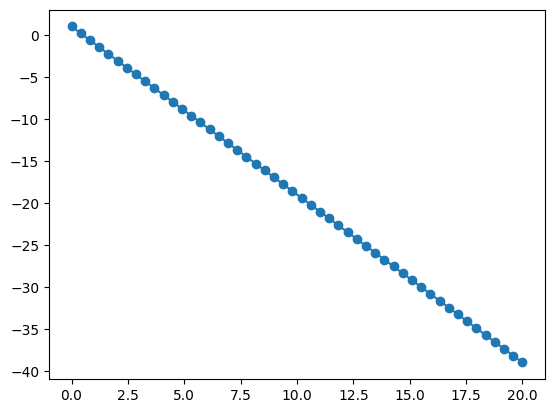

In [ ]:
plt.plot(X, y, marker='o')

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Implement the stop criteria (Gradient Check).
#### Implement the convergence check (cost check).
#### You can use any small values for stop criteria and convergence check. However, the used values in the current implementation used 0.001 for both.

In [14]:
def GD_SingleVar_LR(X, y, alpha, max_iter):
    theta_0 = 0                                                     # Initialization
    theta_1 = 0
    loss = [1]
    thetas = []
    hypos = []
    m = len(X)

    for i in range(max_iter):
        print('*' * 20 , f'Iteration {i}', '*' * 20, '\n')
        y_hat = theta_0 + theta_1 * X                               # Predictions
        print(f"h(x):{y_hat}\n")

        err_vec = y_hat - y                                         # Error Vector
        j = (1 / (2 * m)) * np.sum(np.square(err_vec))              # Cost Function
        print(f"Error Vector:\n{err_vec}\n\nj = {j}\n")

        #### Track variables
        loss.append(j)
        thetas.append((theta_0, theta_1))
        hypos.append(y_hat)

        d_theta_0 = (1 / m) * np.sum(err_vec * 1)                   # Theta 0 gradient
        d_theta_1 = (1 / m) * np.sum(err_vec * X)                   # Theta 1 gradient
        print(f"d_theta_0 : {d_theta_0}")
        print(f"d_theta_1 : {d_theta_1}\n")

        grad_vec = np.array([d_theta_0, d_theta_1])
        grad_norm = np.linalg.norm(grad_vec)
        print(f"Gradient Vector : {grad_vec}")
        print(f"Gradient Vector Norm : {grad_norm}\n")

        if grad_norm < .001 or np.abs((loss[-2] - loss[-1])) < .001:                                                  # Termination Condition
            print(f"Converged after {i} iteration")
            break

        theta_0 = theta_0 - alpha * d_theta_0                       # Theta 0 update
        theta_1 = theta_1 - alpha * d_theta_1                       # Theta 1 update
        print(f"theta_0_new : {theta_0}")
        print(f"theta_1_new : {theta_1}\n")

    loss.pop(0)
    return loss, thetas, hypos, theta_0, theta_1



#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [15]:
loss, thetas, hypos, theta_0, theta_1 = GD_SingleVar_LR(X, y, .0005, 300)

******************** Iteration 0 ******************** 

h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[29.20408163 10.42857143 16.14285714 25.12244898 16.95918367 -0.18367347
 20.2244898  36.55102041 33.28571429 37.36734694 12.06122449 18.59183673
  4.71428571 35.73469388 13.69387755  1.44897959 32.46938776 23.48979592
 11.24489796 15.32653061 34.10204082 30.02040816 34.91836735 30.83673469
  7.16326531 39.         19.40816327 25.93877551 28.3877551   0.63265306
 21.04081633 26.75510204 27.57142857  5.53061224 14.51020408 22.67346939
  8.79591837  3.08163265 -1.         21.85714286  2.26530612 31.65306122
  9.6122449   6.34693878 38.18367347 17.7755102   3.89795918 12.87755102
  7.97959184 24.30612245]

j = 249.88775510204084

d_theta_0 : 19.000000000000004
d_theta_1 : 259.3877551020408

Gradient Vector : [ 19.        259.3877551]
Gradient Vector Norm : 260.08

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

j = 249.88775510204084

Gradient Vector:
[[ 19.       ]
 [259.3877551]]

Gradient Vector Norm:
260.08269357432516

theta_0_new : -0.0095
theta_1_new : -0.12969387


Gradient Vector Norm:
3.150846624874574

theta_0_new : -0.13151756202565473
theta_1_new : -1.8941776723448396

****************** Iteration 64 ********************

h(x):
[ -0.13151756  -0.90465131  -1.67778505  -2.45091879  -3.22405254
  -3.99718628  -4.77032002  -5.54345377  -6.31658751  -7.08972126
  -7.862855    -8.63598874  -9.40912249 -10.18225623 -10.95538998
 -11.72852372 -12.50165746 -13.27479121 -14.04792495 -14.82105869
 -15.59419244 -16.36732618 -17.14045993 -17.91359367 -18.68672741
 -19.45986116 -20.2329949  -21.00612865 -21.77926239 -22.55239613
 -23.32552988 -24.09866362 -24.87179736 -25.64493111 -26.41806485
 -27.1911986  -27.96433234 -28.73746608 -29.51059983 -30.28373357
 -31.05686731 -31.83000106 -32.6031348  -33.37626855 -34.14940229
 -34.92253603 -35.69566978 -36.46880352 -37.24193727 -38.01507101]

Error Vector:
[-1.13151756 -1.08832478 -1.04513199 -1.0019392  -0.95874641 -0.91555363
 -0.87236084 -0.82916805 -0.78597527 -0.74278248 -0.69958969 -0.65639691
 -0.61

#### Calculate r2 score

In [16]:
y_pred = theta_0 + theta_1 * X

In [17]:
r2_score(y, y_pred)

0.9975395965150151

##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

In [18]:
def plot_loss(loss):
    plt.figure(figsize=(20, 7))
    plt.plot(loss, marker="o")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.grid()


def plot_all_reg(X, y, hypos):
    plt.plot(X, y, marker='o')
    for hypo in hypos:
        plt.plot(X, hypo, color='r')
    plt.grid()
    plt.xlabel("X")
    plt.ylabel("Y_pred")

def plot_best_reg(X, y, hypos):
    plt.plot(X, y, marker='o')
    plt.plot(X, hypos[-1], color='r')
    plt.grid()
    plt.xlabel("X")
    plt.ylabel("Y_pred")

def plot_thetas_vs_loss(thetas, loss):
    thetas_0 = []
    thetas_1 = []
    for x in thetas:
        thetas_0.append(x[0])
        thetas_1.append(x[1])
    fig, (ax1, ax2) = plt.subplots(2, 1)
    fig.set_size_inches(7, 8)
    ax1.plot(thetas_0, loss, marker='o')
    ax1.set_xlabel("Theta 0")
    ax1.set_ylabel("Loss")
    ax1.set_title("Learning Rate = .0005")
    ax1.grid()

    ax2.plot(thetas_1, loss, marker='o')
    ax2.set_xlabel("Theta 1")
    ax2.set_ylabel("Loss")
    ax2.set_title("Learning Rate = .0005")
    ax2.grid()

    # plt.grid()
    plt.tight_layout()

#### Plot loss vs. epochs

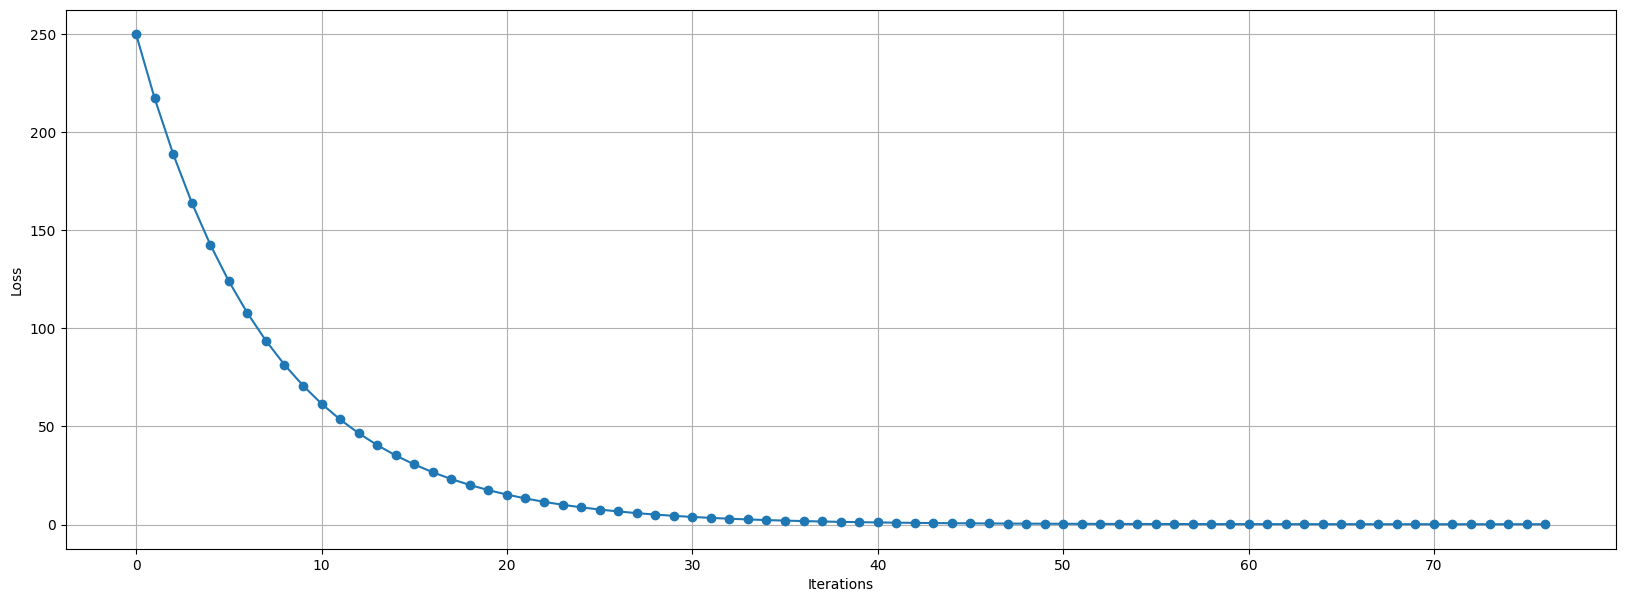

In [19]:
plot_loss(loss)

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

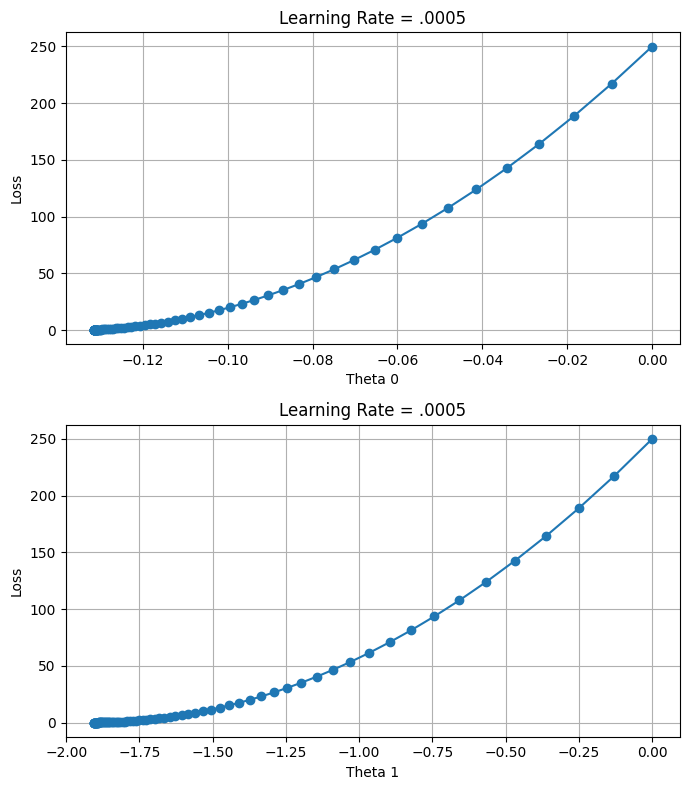

In [20]:
plot_thetas_vs_loss(thetas, loss)

#### Plot all regression lines till converge

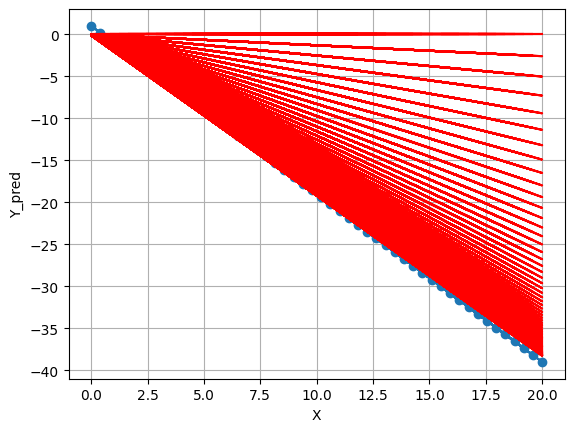

In [21]:
plot_all_reg(X, y, hypos)

#### Plot the best regression line

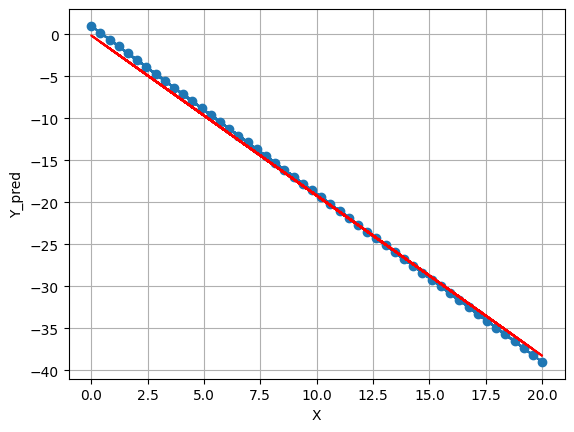

In [22]:
plot_best_reg(X, y, hypos)

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

##### The following results uses alpha = 0.00005 and max. iterations = 1000.

In [ ]:
loss, thetas, hypos, theta_0, theta_1 = GD_SingleVar_LR(X, y, .00005, 1000)

Streaming output truncated to the last 5000 lines.

theta_0_new : -0.12945282792153703
theta_1_new : -1.8308608326086835

******************** Iteration 459 ******************** 

h(x):[ -0.12945283  -0.87674296  -1.6240331   -2.37132324  -3.11861337
  -3.86590351  -4.61319364  -5.36048378  -6.10777391  -6.85506405
  -7.60235419  -8.34964432  -9.09693446  -9.84422459 -10.59151473
 -11.33880486 -12.086095   -12.83338514 -13.58067527 -14.32796541
 -15.07525554 -15.82254568 -16.56983581 -17.31712595 -18.06441609
 -18.81170622 -19.55899636 -20.30628649 -21.05357663 -21.80086676
 -22.5481569  -23.29544704 -24.04273717 -24.79002731 -25.53731744
 -26.28460758 -27.03189772 -27.77918785 -28.52647799 -29.27376812
 -30.02105826 -30.76834839 -31.51563853 -32.26292867 -33.0102188
 -33.75750894 -34.50479907 -35.25208921 -35.99937934 -36.74666948]

Error Vector:
[-1.12945283 -1.06041643 -0.99138004 -0.92234364 -0.85330725 -0.78427085
 -0.71523446 -0.64619806 -0.57716167 -0.50812527 -0.43908888 -0.370

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

j = 249.88775510204084

Gradient Vector:
[[ 19.       ]
 [259.3877551]]

Gradient Vector Norm:
260.08269357432516

theta_0_new : -0.00095
theta_1_new : -0.0129693


Error Vector:
[-1.03616786 -0.42185497  0.19245793  0.80677082  1.42108371  2.0353966
  2.64970949  3.26402238  3.87833527  4.49264817  5.10696106  5.72127395
  6.33558684  6.94989973  7.56421262  8.17852551  8.79283841  9.4071513
 10.02146419 10.63577708 11.25008997 11.86440286 12.47871575 13.09302865
 13.70734154 14.32165443 14.93596732 15.55028021 16.1645931  16.77890599
 17.39321889 18.00753178 18.62184467 19.23615756 19.85047045 20.46478334
 21.07909623 21.69340913 22.30772202 22.92203491 23.5363478  24.15066069
 24.76497358 25.37928647 25.99359937 26.60791226 27.22222515 27.83653804
 28.45085093 29.06516382]

j = 137.49780357676352

Gradient Vector:
[[ 14.01449798]
 [192.36157561]]

Gradient Vector Norm:
192.8714129238948

theta_0_new : -0.03686858155519533
theta_1_new : -0.5045514947736295

****************** Iteration 45 ********************

h(x):
[ -0.03686858  -0.24280797  -0.44874735  -0.65468674  -0.86062612
  -1.06656551  -1.2725049   -1.47844428  -1.68438367  -1.8903230


j = 68.83712790496376

Gradient Vector:
[[  9.82460151]
 [136.03098233]]

Gradient Vector Norm:
136.3853032673908

theta_0_new : -0.06685086270355442
theta_1_new : -0.9177054348813832

****************** Iteration 96 ********************

h(x):
[ -0.06685086  -0.44142451  -0.81599816  -1.1905718   -1.56514545
  -1.9397191   -2.31429274  -2.68886639  -3.06344004  -3.43801368
  -3.81258733  -4.18716098  -4.56173463  -4.93630827  -5.31088192
  -5.68545557  -6.06002921  -6.43460286  -6.80917651  -7.18375015
  -7.5583238   -7.93289745  -8.30747109  -8.68204474  -9.05661839
  -9.43119203  -9.80576568 -10.18033933 -10.55491298 -10.92948662
 -11.30406027 -11.67863392 -12.05320756 -12.42778121 -12.80235486
 -13.1769285  -13.55150215 -13.9260758  -14.30064944 -14.67522309
 -15.04979674 -15.42437039 -15.79894403 -16.17351768 -16.54809133
 -16.92266497 -17.29723862 -17.67181227 -18.04638591 -18.42095956]

Error Vector:
[-1.06685086 -0.62509798 -0.1833451   0.25840779  0.70016067  1.14191356
  1.5


j = 31.81571190585062

Gradient Vector:
[[ 6.57608066]
 [92.35572627]]

Gradient Vector Norm:
92.58955130845696

theta_0_new : -0.08984261951516516
theta_1_new : -1.238058338321551

****************** Iteration 153 ********************

h(x):
[ -0.08984262  -0.59517255  -1.10050249  -1.60583242  -2.11116236
  -2.61649229  -3.12182222  -3.62715216  -4.13248209  -4.63781203
  -5.14314196  -5.64847189  -6.15380183  -6.65913176  -7.1644617
  -7.66979163  -8.17512156  -8.6804515   -9.18578143  -9.69111137
 -10.1964413  -10.70177123 -11.20710117 -11.7124311  -12.21776104
 -12.72309097 -13.2284209  -13.73375084 -14.23908077 -14.74441071
 -15.24974064 -15.75507057 -16.26040051 -16.76573044 -17.27106038
 -17.77639031 -18.28172024 -18.78705018 -19.29238011 -19.79771005
 -20.30303998 -20.80836991 -21.31369985 -21.81902978 -22.32435972
 -22.82968965 -23.33501958 -23.84034952 -24.34567945 -24.85100939]

Error Vector:
[-1.08984262 -0.77884602 -0.46784943 -0.15685283  0.15414377  0.46514036
  0.7761

h(x):
[ -0.10315948  -0.68542902  -1.26769856  -1.8499681   -2.43223764
  -3.01450718  -3.59677672  -4.17904625  -4.76131579  -5.34358533
  -5.92585487  -6.50812441  -7.09039395  -7.67266349  -8.25493303
  -8.83720257  -9.41947211 -10.00174165 -10.58401118 -11.16628072
 -11.74855026 -12.3308198  -12.91308934 -13.49535888 -14.07762842
 -14.65989796 -15.2421675  -15.82443704 -16.40670658 -16.98897611
 -17.57124565 -18.15351519 -18.73578473 -19.31805427 -19.90032381
 -20.48259335 -21.06486289 -21.64713243 -22.22940197 -22.81167151
 -23.39394104 -23.97621058 -24.55848012 -25.14074966 -25.7230192
 -26.30528874 -26.88755828 -27.46982782 -28.05209736 -28.6343669 ]

Error Vector:
[-1.10315948 -0.86910249 -0.6350455  -0.40098851 -0.16693152  0.06712548
  0.30118247  0.53523946  0.76929645  1.00335344  1.23741043  1.47146743
  1.70552442  1.93958141  2.1736384   2.40769539  2.64175238  2.87580937
  3.10986637  3.34392336  3.57798035  3.81203734  4.04609433  4.28015132
  4.51420832  4.74826531  4

Error Vector:
[-1.11337893 -0.93966527 -0.76595161 -0.59223795 -0.41852429 -0.24481063
 -0.07109696  0.1026167   0.27633036  0.45004402  0.62375768  0.79747134
  0.971185    1.14489866  1.31861232  1.49232598  1.66603965  1.83975331
  2.01346697  2.18718063  2.36089429  2.53460795  2.70832161  2.88203527
  3.05574893  3.22946259  3.40317626  3.57688992  3.75060358  3.92431724
  4.0980309   4.27174456  4.44545822  4.61917188  4.79288554  4.9665992
  5.14031287  5.31402653  5.48774019  5.66145385  5.83516751  6.00888117
  6.18259483  6.35630849  6.53002215  6.70373581  6.87744948  7.05116314
  7.2248768   7.39859046]

j = 8.08010689404443

Gradient Vector:
[[ 3.14260576]
 [46.19171882]]

Gradient Vector Norm:
46.29849737188856

theta_0_new : -0.11353606105419035
theta_1_new : -1.5767111164794902

****************** Iteration 255 ********************

h(x):
[ -0.11353606  -0.75709162  -1.40064718  -2.04420273  -2.68775829
  -3.33131385  -3.97486941  -4.61842497  -5.26198052  -5.90553608
 

theta_0_new : -0.12177000204725738
theta_1_new : -1.7006104572918064

****************** Iteration 322 ********************

h(x):
[ -0.12177     -0.81589672  -1.51002344  -2.20415015  -2.89827687
  -3.59240359  -4.28653031  -4.98065702  -5.67478374  -6.36891046
  -7.06303717  -7.75716389  -8.45129061  -9.14541733  -9.83954404
 -10.53367076 -11.22779748 -11.9219242  -12.61605091 -13.31017763
 -14.00430435 -14.69843106 -15.39255778 -16.0866845  -16.78081122
 -17.47493793 -18.16906465 -18.86319137 -19.55731809 -20.2514448
 -20.94557152 -21.63969824 -22.33382495 -23.02795167 -23.72207839
 -24.41620511 -25.11033182 -25.80445854 -26.49858526 -27.19271198
 -27.88683869 -28.58096541 -29.27509213 -29.96921884 -30.66334556
 -31.35747228 -32.051599   -32.74572571 -33.43985243 -34.13397915]

Error Vector:
[-1.12177    -0.99957019 -0.87737038 -0.75517056 -0.63297075 -0.51077094
 -0.38857112 -0.26637131 -0.1441715  -0.02197168  0.10022813  0.22242794
  0.34462776  0.46682757  0.58902738  0.7112272 


Error Vector:
[-1.12545257 -1.02723783 -0.92902308 -0.83080834 -0.7325936  -0.63437885
 -0.53616411 -0.43794937 -0.33973462 -0.24151988 -0.14330514 -0.04509039
  0.05312435  0.15133909  0.24955384  0.34776858  0.44598332  0.54419807
  0.64241281  0.74062755  0.8388423   0.93705704  1.03527178  1.13348653
  1.23170127  1.32991601  1.42813076  1.5263455   1.62456024  1.72277499
  1.82098973  1.91920447  2.01741922  2.11563396  2.2138487   2.31206345
  2.41027819  2.50849293  2.60670768  2.70492242  2.80313716  2.90135191
  2.99956665  3.09778139  3.19599614  3.29421088  3.39242562  3.49064037
  3.58885511  3.68706985]

j = 1.8246392779177878

Gradient Vector:
[[ 1.28080864]
 [21.15633959]]

Gradient Vector Norm:
21.195074327352817

theta_0_new : -0.1255166095763225
theta_1_new : -1.7604316959298962

****************** Iteration 370 ********************

h(x):
[ -0.12551661  -0.84406016  -1.56260371  -2.28114726  -2.99969081
  -3.71823436  -4.43677791  -5.15532146  -5.873865    -6.592408

theta_0_new : -0.12838891843775904
theta_1_new : -1.81026389922397

****************** Iteration 427 ********************

h(x):
[ -0.12838892  -0.86727214  -1.60615537  -2.34503859  -3.08392182
  -3.82280504  -4.56168826  -5.30057149  -6.03945471  -6.77833794
  -7.51722116  -8.25610438  -8.99498761  -9.73387083 -10.47275406
 -11.21163728 -11.95052051 -12.68940373 -13.42828695 -14.16717018
 -14.9060534  -15.64493663 -16.38381985 -17.12270307 -17.8615863
 -18.60046952 -19.33935275 -20.07823597 -20.8171192  -21.55600242
 -22.29488564 -23.03376887 -23.77265209 -24.51153532 -25.25041854
 -25.98930176 -26.72818499 -27.46706821 -28.20595144 -28.94483466
 -29.68371789 -30.42260111 -31.16148433 -31.90036756 -32.63925078
 -33.37813401 -34.11701723 -34.85590045 -35.59478368 -36.3336669 ]

Error Vector:
[-1.12838892 -1.05094561 -0.97350231 -0.896059   -0.81861569 -0.74117239
 -0.66372908 -0.58628577 -0.50884247 -0.43139916 -0.35395585 -0.27651255
 -0.19906924 -0.12162593 -0.04418263  0.03326068  


Gradient Vector Norm:
9.705665950069054

theta_0_new : -0.13009444831874967
theta_1_new : -1.8445985880847027

****************** Iteration 485 ********************

h(x):
[ -0.13009445  -0.88299183  -1.63588921  -2.3887866   -3.14168398
  -3.89458136  -4.64747875  -5.40037613  -6.15327351  -6.90617089
  -7.65906828  -8.41196566  -9.16486304  -9.91776043 -10.67065781
 -11.42355519 -12.17645257 -12.92934996 -13.68224734 -14.43514472
 -15.18804211 -15.94093949 -16.69383687 -17.44673425 -18.19963164
 -18.95252902 -19.7054264  -20.45832379 -21.21122117 -21.96411855
 -22.71701594 -23.46991332 -24.2228107  -24.97570808 -25.72860547
 -26.48150285 -27.23440023 -27.98729762 -28.740195   -29.49309238
 -30.24598976 -30.99888715 -31.75178453 -32.50468191 -33.2575793
 -34.01047668 -34.76337406 -35.51627144 -36.26916883 -37.02206621]

Error Vector:
[-1.13009445 -1.0666653  -1.00323615 -0.93980701 -0.87637786 -0.81294871
 -0.74951956 -0.68609041 -0.62266127 -0.55923212 -0.49580297 -0.43237382
 -0.36


Error Vector:
[-1.13097983e+00 -1.07714118e+00 -1.02330254e+00 -9.69463898e-01
 -9.15625255e-01 -8.61786611e-01 -8.07947968e-01 -7.54109325e-01
 -7.00270682e-01 -6.46432038e-01 -5.92593395e-01 -5.38754752e-01
 -4.84916109e-01 -4.31077465e-01 -3.77238822e-01 -3.23400179e-01
 -2.69561536e-01 -2.15722892e-01 -1.61884249e-01 -1.08045606e-01
 -5.42069626e-02 -3.68319395e-04  5.34703239e-02  1.07308967e-01
  1.61147610e-01  2.14986254e-01  2.68824897e-01  3.22663540e-01
  3.76502183e-01  4.30340827e-01  4.84179470e-01  5.38018113e-01
  5.91856756e-01  6.45695400e-01  6.99534043e-01  7.53372686e-01
  8.07211329e-01  8.61049973e-01  9.14888616e-01  9.68727259e-01
  1.02256590e+00  1.07640455e+00  1.13024319e+00  1.18408183e+00
  1.23792048e+00  1.29175912e+00  1.34559776e+00  1.39943641e+00
  1.45327505e+00  1.50711369e+00]

j = 0.31950125912269717

Gradient Vector:
[[0.18806693]
 [6.456954  ]]

Gradient Vector Norm:
6.459692258812109

theta_0_new : -0.1309892309985654
theta_1_new : -1.868418

In [ ]:
r2_score(y, theta_0 + theta_1 * X)

0.9965793400861428

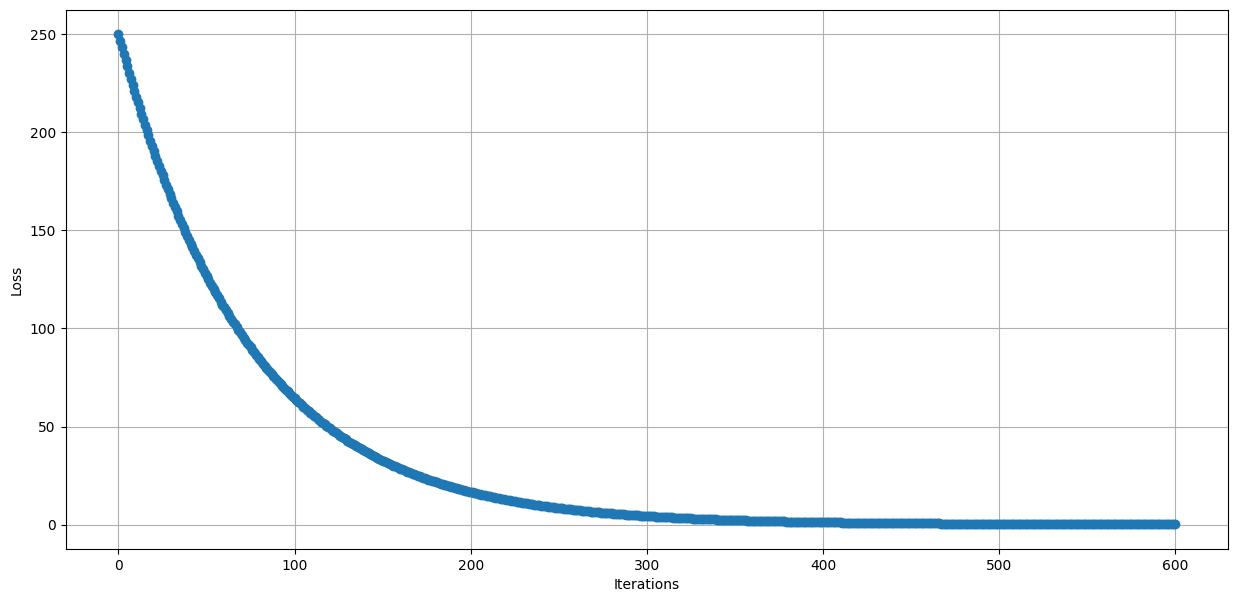

In [ ]:
plot_loss(loss)

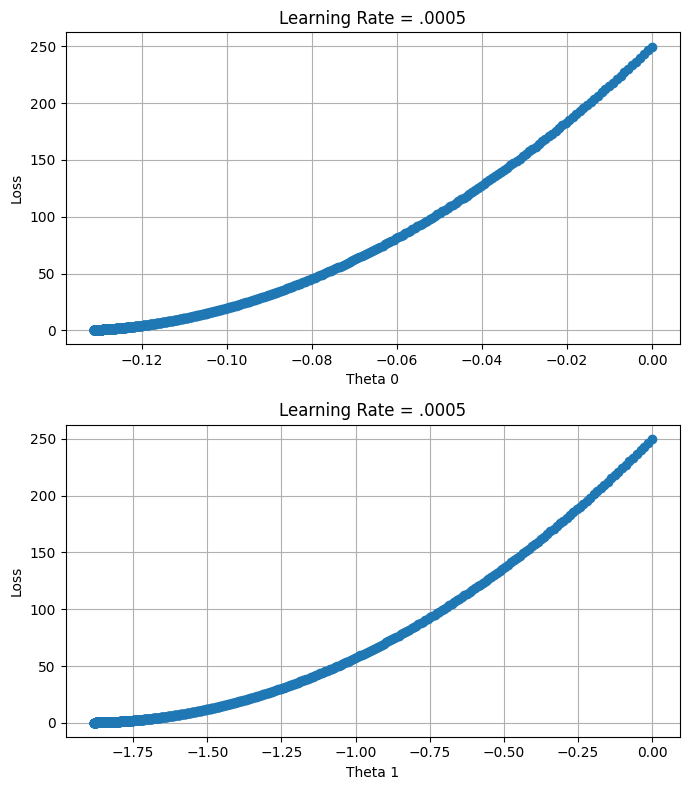

In [ ]:
plot_thetas_vs_loss(thetas, loss)

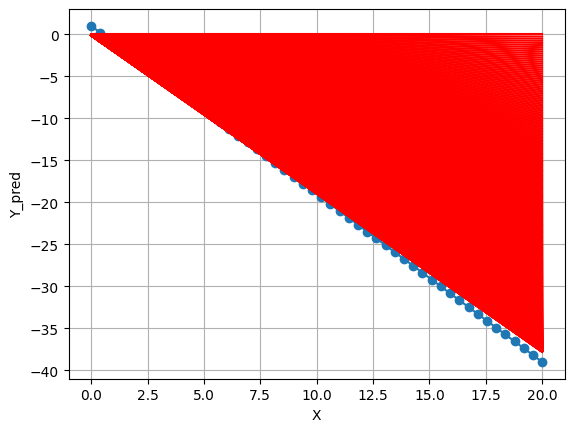

In [ ]:
plot_all_reg(X, y, hypos)

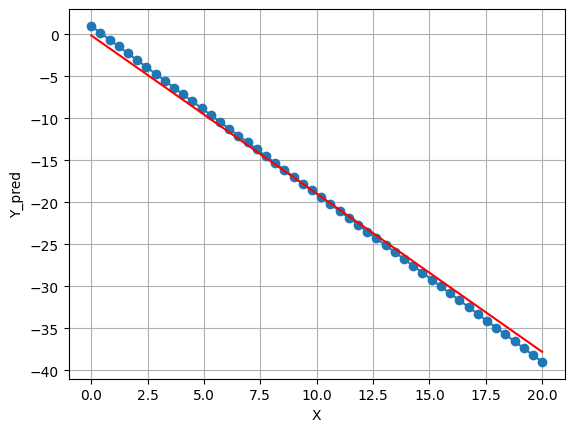

In [ ]:
plot_best_reg(X, y, hypos)

##### The following results uses alpha = 0.005 and max. iterations = 300.

In [ ]:
loss, thetas, hypos, theta_0, theta_1 = GD_SingleVar_LR(X, y, .005, 300)

******************** Iteration 0 ******************** 

h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

j = 249.88775510204087

d_theta_0 : 19.0
d_theta_1 : 259.38775510204084

Gradient Vector : [ 19.        259.3877551]
Gradient Vector Norm : 260.08269357432516



****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

j = 249.88775510204084

Gradient Vector:
[[ 19.       ]
 [259.3877551]]

Gradient Vector Norm:
260.08269357432516

theta_0_new : -0.095
theta_1_new : -1.296938775

In [ ]:
r2_score(y, theta_0 + theta_1 * X)

0.9976200723230484

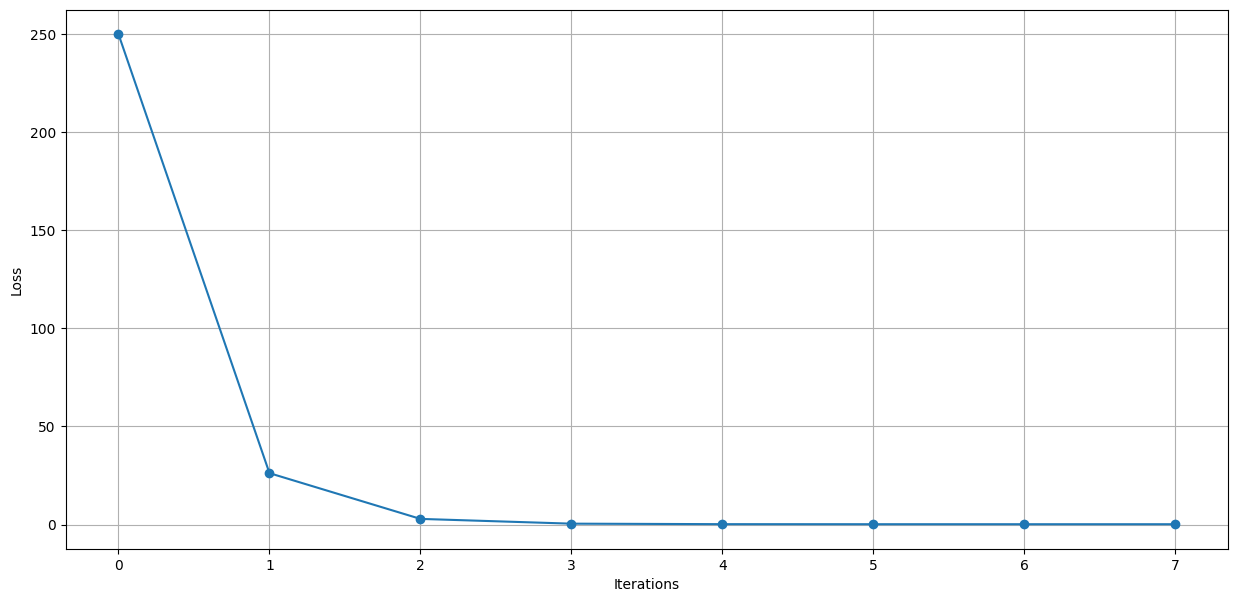

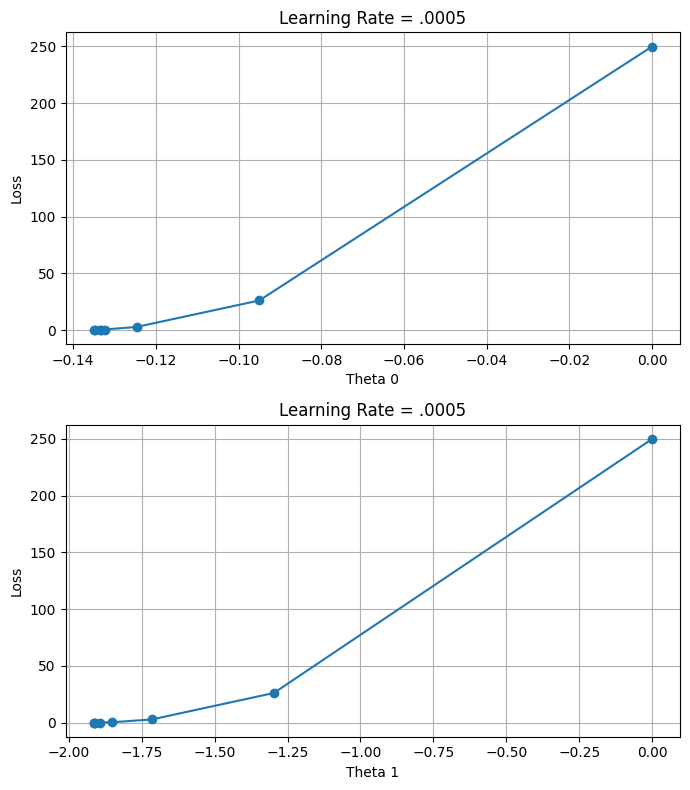

In [ ]:
plot_loss(loss)
plot_thetas_vs_loss(thetas, loss)

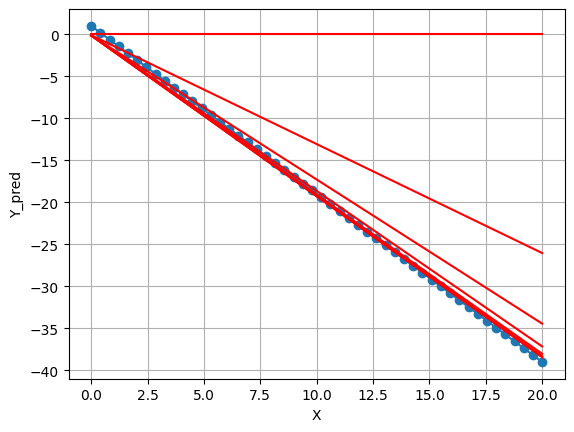

In [ ]:
plot_all_reg(X, y, hypos)

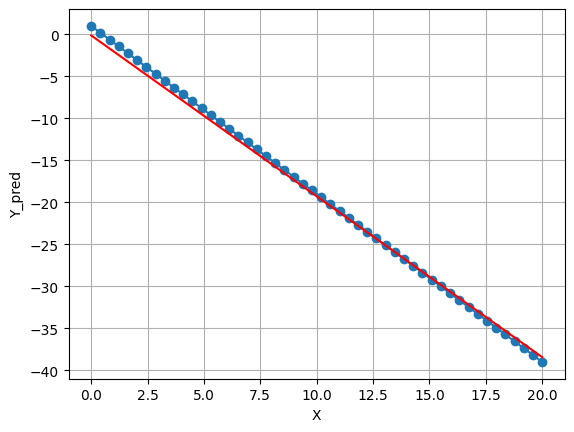

In [ ]:
plot_best_reg(X, y, hypos)

## Stochastic GD

#### Update the implementation of the Batch GD to be Stochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to the Batch GD.
#### Do not forget to shuffle the data.

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
- <font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>
- <font color='red'><b>To obtain the same results use np.random.seed(101) before shuffle</b></font>

In [5]:
np.random.seed(101)

In [6]:
X, y = shuffle(X, y)

In [ ]:
# index = np.random.permutation(len(y))
# X = X[index]
# y = y[index]
# X, y

In [23]:
def St_GD_LR_1var(X, y, alpha, max_iter):
    theta_0 = 0                                                     # Initialization
    theta_1 = 0
    loss = [1]
    thetas_0 = []
    thetas_1 = []
    m = len(X)

    for i in range(max_iter):
        print('*' * 20 , f'Epochs {i}', '*' * 20, '\n')
        for j in range(m):
            z = X[j]
            a = y[j]
            y_hat = theta_0 + theta_1 * z                             # Predictions
            # print(f"h(x):{y_hat}\n")

            err_vec = y_hat - a                                        # Error Vector
            j = (1 / (2)) * np.sum(np.square(err_vec))              # Cost Function

            #### Track variables
            loss.append(j)
            thetas_0.append(theta_0)
            thetas_1.append(theta_1)

            d_theta_0 =  np.sum(err_vec * 1)                   # Theta 0 gradient
            d_theta_1 =  np.sum(err_vec * z)                   # Theta 1 gradient
            # print(f"d_theta_0 : {d_theta_0}")
            # print(f"d_theta_1 : {d_theta_1}\n")

            grad_vec = np.array([d_theta_0, d_theta_1])
            grad_norm = np.linalg.norm(grad_vec)

            if grad_norm < .001:                                                  # Termination Condition
                print(f"Converged after {i} iteration")

                print(f"cost = {j}\n")
                print(f"Gradient Vector : {grad_vec}")
                print(f"Gradient Vector Norm : {grad_norm}\n")
                print(f"theta_0_new : {theta_0}")
                print(f"theta_1_new : {theta_1}\n")
                loss.pop(0)
                return thetas_0, thetas_1, loss, theta_0, theta_1

            theta_0 = theta_0 - alpha * d_theta_0                       # Theta 0 update
            theta_1 = theta_1 - alpha * d_theta_1                       # Theta 1 update

        print(f"cost = {j}\n")
        print(f"Gradient Vector : {grad_vec}")
        print(f"Gradient Vector Norm : {grad_norm}\n")
        print(f"theta_0_new : {theta_0}")
        print(f"theta_1_new : {theta_1}\n")
        if  np.abs((loss[-(m + 1)] - loss[-1])) < .001:
            print(f"Converged after {i} iteration")
            break

    loss.pop(0)
    return thetas_0, thetas_1, loss, theta_0, theta_1



##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [24]:
all_theta_0_St,all_theta_1_St,loss_St,opt_theta_0_St,opt_theta_1_St  = St_GD_LR_1var(X,y,0.0005,300)

******************** Epochs 0 ******************** 

cost = 0.25209950460007696

Gradient Vector : [0.71006972 8.98455566]
Gradient Vector Norm : 9.012571185993627

theta_0_new : -0.12761222125212127
theta_1_new : -1.8592841835063174

******************** Epochs 1 ******************** 

cost = 0.00017746175474585356

Gradient Vector : [0.01883941 0.23837626]
Gradient Vector Norm : 0.23911955711901475

theta_0_new : -0.12397684636948911
theta_1_new : -1.909800583000258

******************** Epochs 2 ******************** 

cost = 3.587899143823388e-08

Gradient Vector : [0.00026788 0.00338946]
Gradient Vector Norm : 0.0034000305958517907

theta_0_new : -0.1168602386254817
theta_1_new : -1.9117125478064034

Converged after 2 iteration


In [25]:
r2_score(y, opt_theta_0_St + opt_theta_1_St * X)

0.9976568143190673

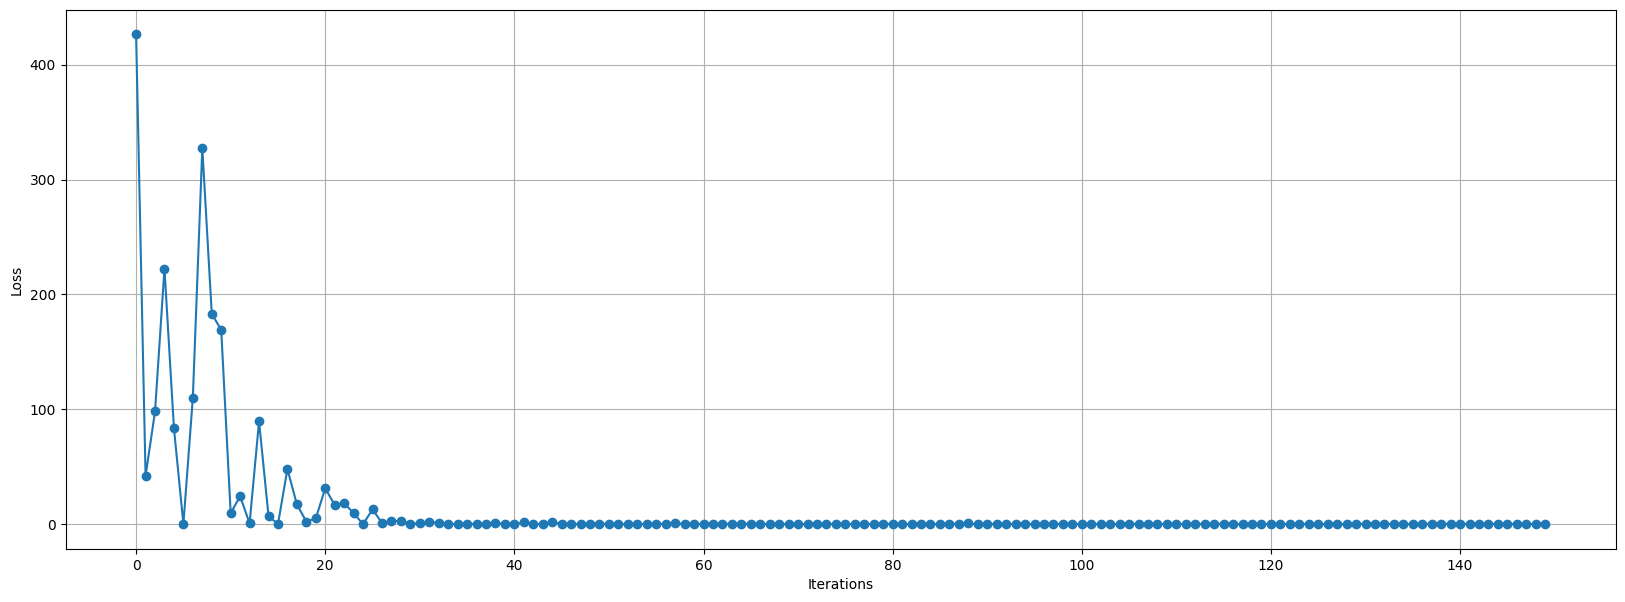

In [26]:
plot_loss(loss_St)

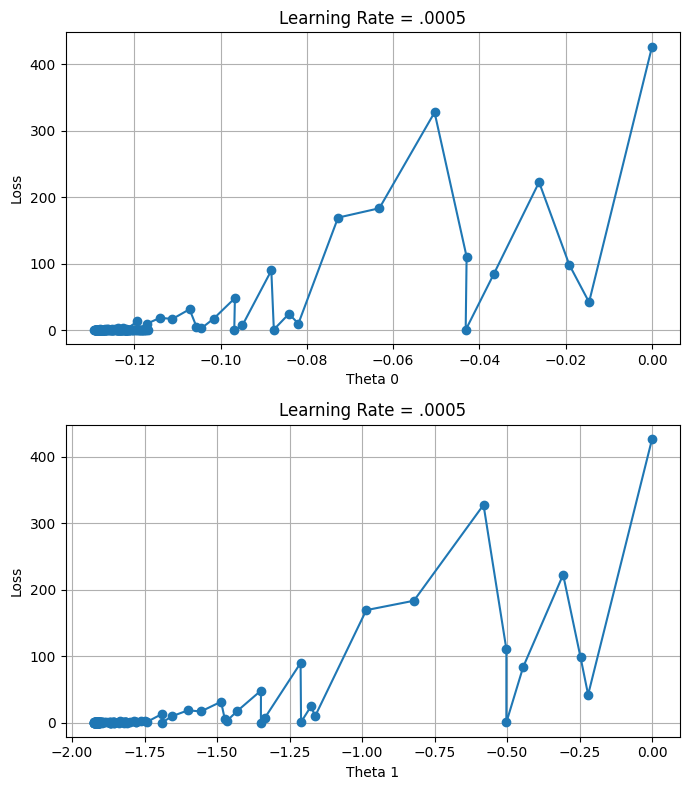

In [27]:
def plot_thetas_0_1_vs_loss(thetas_0, thetas_1, loss):
    fig, (ax1, ax2) = plt.subplots(2, 1)
    fig.set_size_inches(7, 8)
    ax1.plot(thetas_0, loss, marker='o')
    ax1.set_xlabel("Theta 0")
    ax1.set_ylabel("Loss")
    ax1.set_title("Learning Rate = .0005")
    ax1.grid()

    ax2.plot(thetas_1, loss, marker='o')
    ax2.set_xlabel("Theta 1")
    ax2.set_ylabel("Loss")
    ax2.set_title("Learning Rate = .0005")
    ax2.grid()

    # plt.grid()
    plt.tight_layout()

plot_thetas_0_1_vs_loss(all_theta_0_St,all_theta_1_St, loss_St)

##### The following results uses alpha = 0.0001 and max. iterations = 300.

In [28]:
all_theta_0_St,all_theta_1_St,loss_St,opt_theta_0_St,opt_theta_1_St  = St_GD_LR_1var(X,y,0.0001,300)

******************** Epochs 0 ******************** 

cost = 77.08339441916262

Gradient Vector : [ 12.41639194 157.10536742]
Gradient Vector Norm : 157.59525139074904

theta_0_new : -0.0684094452130673
theta_1_new : -0.9500743631688013

******************** Epochs 1 ******************** 

cost = 19.384194190624033

Gradient Vector : [ 6.22642661 78.78335716]
Gradient Vector Norm : 79.02901842704571

theta_0_new : -0.10214664348275128
theta_1_new : -1.428733851630339

******************** Epochs 2 ******************** 

cost = 4.830561509456486

Gradient Vector : [ 3.10823471 39.3286841 ]
Gradient Vector Norm : 39.45131830456044

theta_0_new : -0.11841844022588549
theta_1_new : -1.6699154908906342

******************** Epochs 3 ******************** 

cost = 1.181899543652157

Gradient Vector : [ 1.53746515 19.45364067]
Gradient Vector Norm : 19.514300769285008

theta_0_new : -0.12589287520313883
theta_1_new : -1.7914663162395936

******************** Epochs 4 ******************** 

cost

****************** Epoch 0 ********************

Cost = 77.08339441916262

Gradient Vector:
[[ 12.41639194]
 [157.10536742]]

Gradient Vector Norm:
157.59525139074904

theta_0_new : -0.06716780601894395
theta_1_new : -0.9343638264268326

****************** Epoch 1 ********************

Cost = 19.384194190624033

Gradient Vector:
[[ 6.22642661]
 [78.78335716]]

Gradient Vector Norm:
79.02901842704571

theta_0_new : -0.10152400082133746
theta_1_new : -1.4208555159144907

****************** Epoch 2 ********************

Cost = 4.830561509456486

Gradient Vector:
[[ 3.10823471]
 [39.3286841 ]]

Gradient Vector Norm:
39.45131830456044

theta_0_new : -0.1181076167547815
theta_1_new : -1.665982622480747

****************** Epoch 3 ********************

Cost = 1.181899543652157

Gradient Vector:
[[ 1.53746515]
 [19.45364067]]

Gradient Vector Norm:
19.514300769285008

theta_0_new : -0.12573912868814405
theta_1_new : -1.7895209521723126

****************** Epoch 4 ********************

Cost = 0

In [29]:
r2_score(y, opt_theta_0_St + opt_theta_1_St * X)

0.9976375173449827

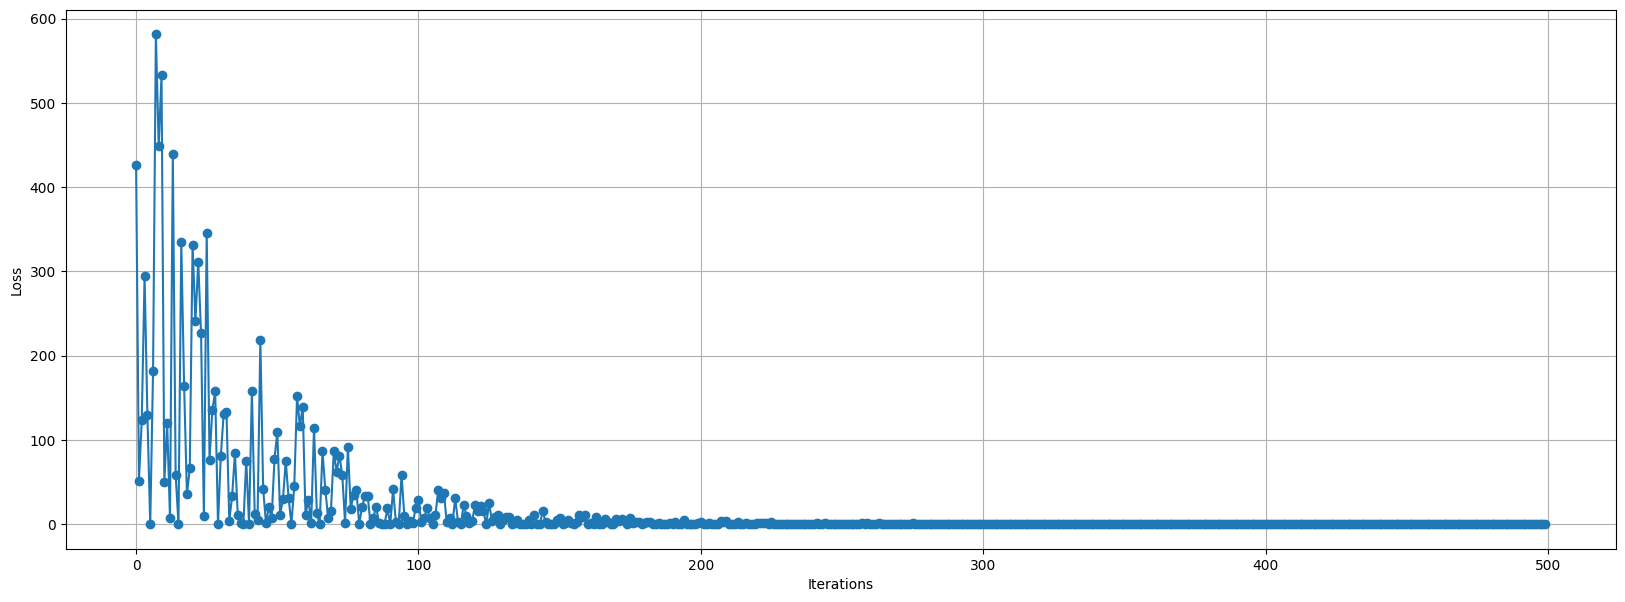

In [30]:
plot_loss(loss_St)

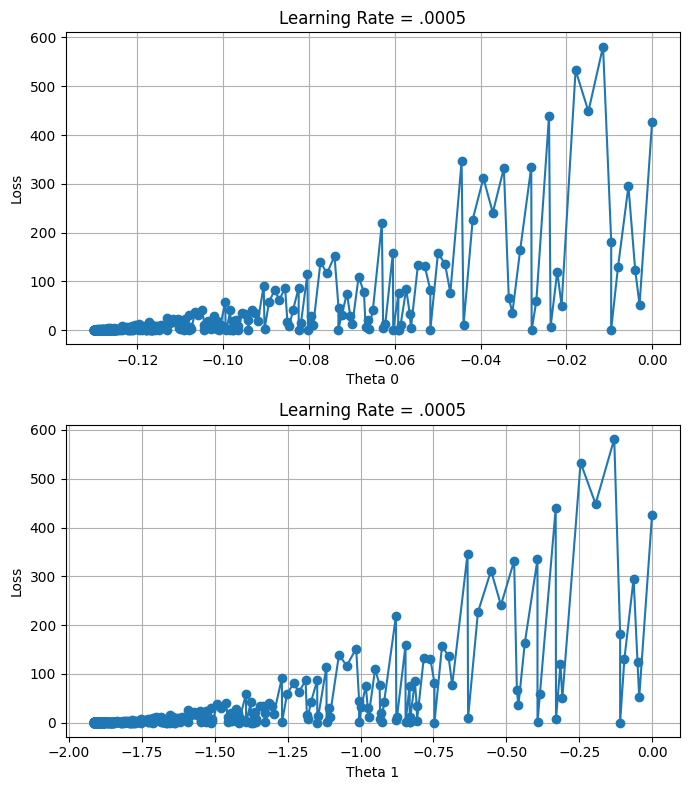

In [31]:
plot_thetas_0_1_vs_loss(all_theta_0_St,all_theta_1_St,loss_St)

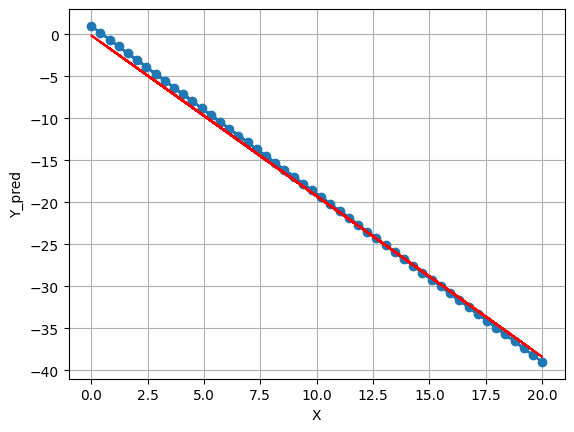

In [32]:
plot_best_reg(X, y, [opt_theta_0_St + opt_theta_1_St * X])

##### The following results uses alpha = 0.00007 and max. iterations = 300.

In [33]:
all_theta_0_St,all_theta_1_St,loss_St,opt_theta_0_St,opt_theta_1_St  = St_GD_LR_1var(X,y,0.00007,300)

******************** Epochs 0 ******************** 

cost = 115.77496572621477

Gradient Vector : [ 15.21676482 192.53865685]
Gradient Vector Norm : 193.13902845642275

theta_0_new : -0.0526625963181957
theta_1_new : -0.7277523032709559

******************** Epochs 1 ******************** 

cost = 44.27618208821564

Gradient Vector : [  9.41022657 119.06817298]
Gradient Vector Norm : 119.43944985086782

theta_0_new : -0.08492087485410607
theta_1_new : -1.1789316302972381

******************** Epochs 2 ******************** 

cost = 16.881779141921317

Gradient Vector : [ 5.81064181 73.52240662]
Gradient Vector Norm : 73.75166325784151

theta_0_new : -0.10453040045312463
theta_1_new : -1.4586570394661047

******************** Epochs 3 ******************** 

cost = 6.40532844123651

Gradient Vector : [ 3.5791978  45.28780888]
Gradient Vector Norm : 45.42902475523053

theta_0_new : -0.11629902421809676
theta_1_new : -1.6320942310148396

******************** Epochs 4 ******************** 

c

In [34]:
r2_score(y, opt_theta_0_St + opt_theta_1_St * X)

0.9976193527156806

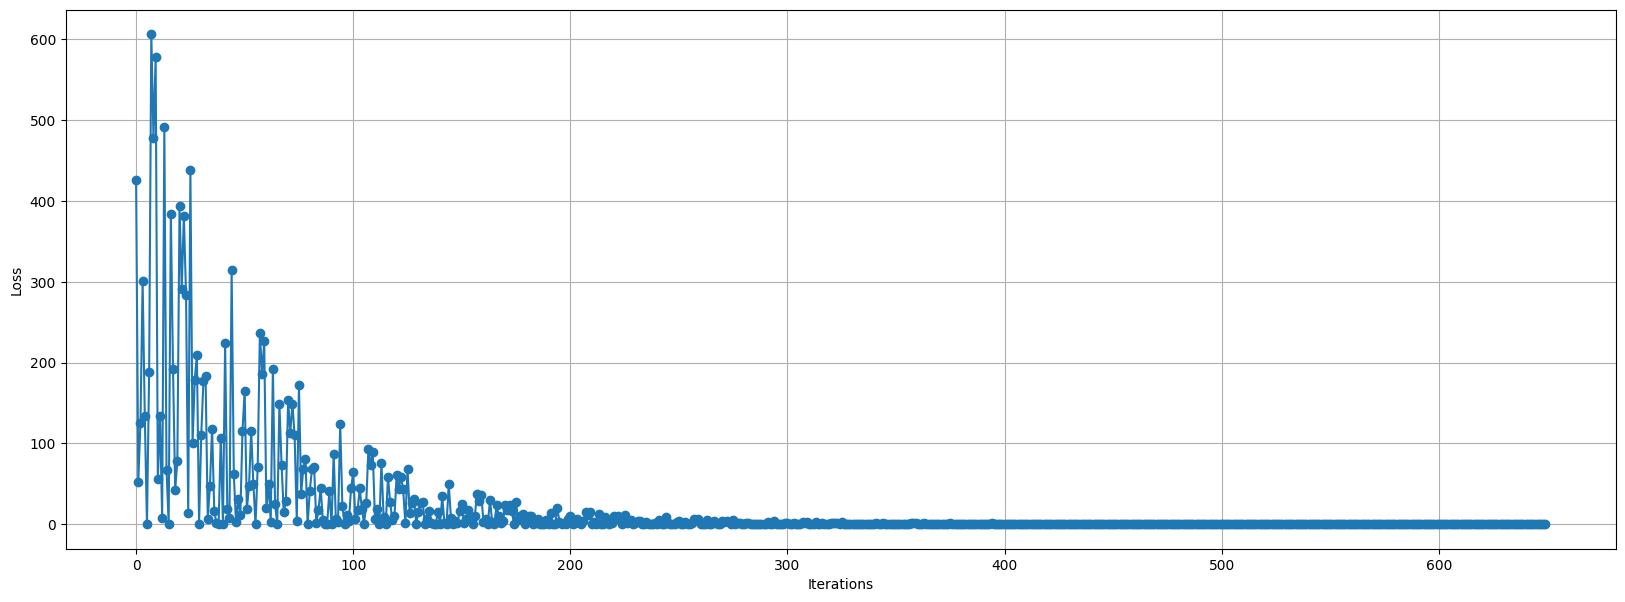

In [35]:
plot_loss(loss_St)

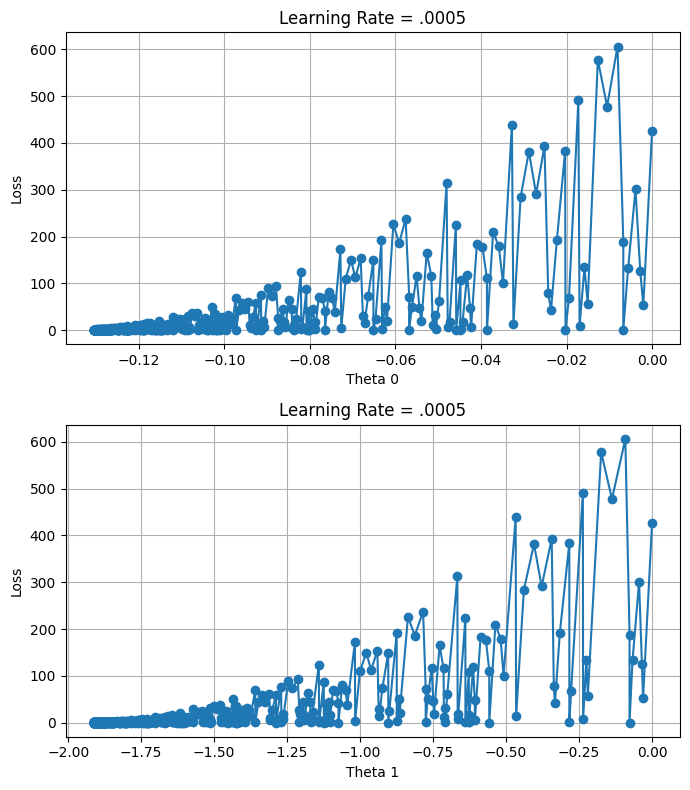

In [36]:
plot_thetas_0_1_vs_loss(all_theta_0_St,all_theta_1_St,loss_St)

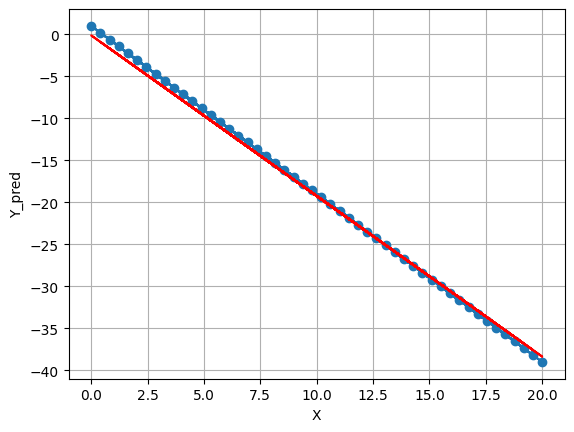

In [37]:
plot_best_reg(X, y, [opt_theta_0_St + opt_theta_1_St * X])

## Mini-Batch GD

#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations
#### Change batch size and see the effect
#### Do not forget to shuffle the data

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
-<font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>
- <font color='red'><b>To obtain the same results use np.random.seed(101) before shuffle</b></font>

In [96]:
def MB_GD_LR_1var(X, y, alpha, max_iter, batch=5):
    theta_0 = 0                                                     # Initialization
    theta_1 = 0
    loss = [1]
    thetas_0 = []
    thetas_1 = []
    m = len(X)

    for i in range(max_iter):
        print('*' * 20 , f'Epochs {i}', '*' * 20, '\n')
        for j in range(0, m, batch):
            z = X[j:j+batch]
            a = y[j:j+batch]
            y_hat = theta_0 + theta_1 * z                             # Predictions
            # print(f"h(x):{y_hat}\n")

            err_vec = y_hat - a                                        # Error Vector
            j = (1 / (2 * batch)) * np.sum(np.square(err_vec))              # Cost Function

            #### Track variables
            loss.append(j)
            thetas_0.append(theta_0)
            thetas_1.append(theta_1)

            d_theta_0 =  np.sum(err_vec * 1) / batch                   # Theta 0 gradient
            d_theta_1 =  np.sum(err_vec * z) / batch                  # Theta 1 gradient
            # print(f"d_theta_0 : {d_theta_0}")
            # print(f"d_theta_1 : {d_theta_1}\n")

            grad_vec = np.array([d_theta_0, d_theta_1])
            grad_norm = np.linalg.norm(grad_vec)

            if grad_norm < .001:                                                  # Termination Condition
                print(f"Converged after {i} iteration")

                print(f"cost = {j}\n")
                print(f"Gradient Vector : {grad_vec}")
                print(f"Gradient Vector Norm : {grad_norm}\n")
                print(f"theta_0_new : {theta_0}")
                print(f"theta_1_new : {theta_1}\n")
                loss.pop(0)
                return thetas_0, thetas_1, loss, theta_0, theta_1

            theta_0 = theta_0 - alpha * d_theta_0                       # Theta 0 update
            theta_1 = theta_1 - alpha * d_theta_1                       # Theta 1 update

        print(f"cost = {j}\n")
        print(f"Gradient Vector : {grad_vec}")
        print(f"Gradient Vector Norm : {grad_norm}\n")
        print(f"theta_0_new : {theta_0}")
        print(f"theta_1_new : {theta_1}\n")
        if  np.abs((loss[- int(np.ceil(m /batch) + 1)] - loss[-1])) < .01:
            print(f"Converged after {i} iteration")
            break

    loss.pop(0)
    return thetas_0, thetas_1, loss, theta_0, theta_1



##### The following results uses batch size=5, alpha = 0.0005 and max. iterations = 300.

In [70]:
all_theta_0_St,all_theta_1_St,loss_St,opt_theta_0_St,opt_theta_1_St  = MB_GD_LR_1var(X,y,0.0005,300, 5)

******************** Epochs 0 ******************** 

cost = 28.749693808097824

Gradient Vector : [ 6.55556162 60.7816351 ]
Gradient Vector Norm : 61.13413574891091

theta_0_new : -0.06978924724113063
theta_1_new : -0.9693635987180408

******************** Epochs 1 ******************** 

cost = 6.467967792096373

Gradient Vector : [ 2.96619847 28.61439115]
Gradient Vector Norm : 28.767719999075442

theta_0_new : -0.103504017832776
theta_1_new : -1.44799256525687

******************** Epochs 2 ******************** 

cost = 1.3823105180838944

Gradient Vector : [ 1.19448224 12.73525899]
Gradient Vector Norm : 12.791153559071402

theta_0_new : -0.11940982177970424
theta_1_new : -1.6843464761632723

******************** Epochs 3 ******************** 

cost = 0.312788377888108

Gradient Vector : [0.32013523 4.89754198]
Gradient Vector Norm : 4.9079938882509655

theta_0_new : -0.12652431396007574
theta_1_new : -1.8010894682190426

******************** Epochs 4 ******************** 

cost = 0

In [71]:
r2_score(y, opt_theta_0_St + opt_theta_1_St * X)

0.9968256200044286

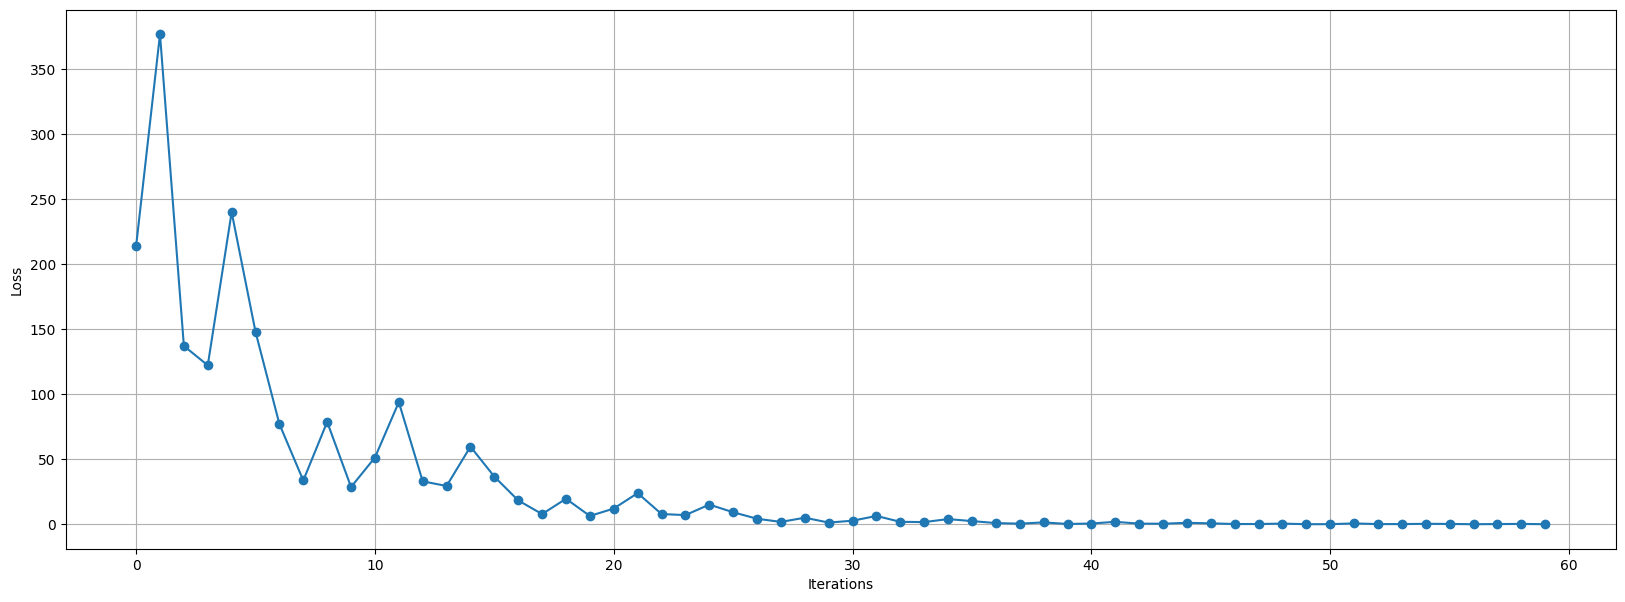

In [72]:
plot_loss(loss_St)

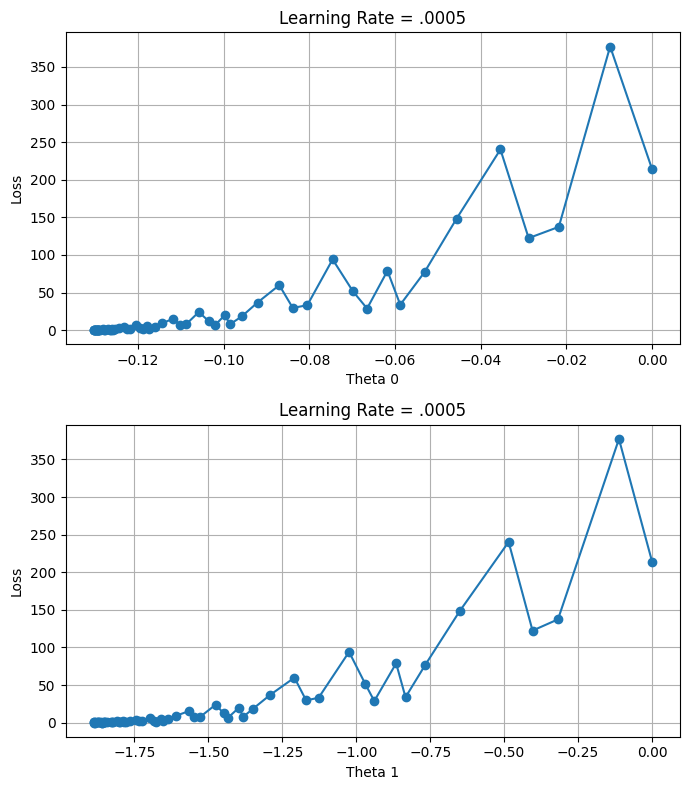

In [73]:
plot_thetas_0_1_vs_loss(all_theta_0_St,all_theta_1_St,loss_St)

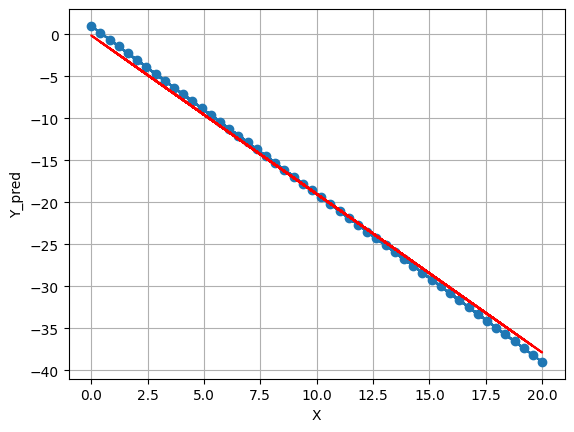

In [74]:
plot_best_reg(X, y, [opt_theta_0_St + opt_theta_1_St * X])

##### The following results uses batch size=10, alpha = 0.0005 and max. iterations = 300.

In [88]:
all_theta_0_St,all_theta_1_St,loss_St,opt_theta_0_St,opt_theta_1_St  = MB_GD_LR_1var(X,y,0.0005,300, 10)

******************** Epochs 0 ******************** 

cost = 102.73346702490926

Gradient Vector : [ 11.3640554 144.4464855]
Gradient Vector Norm : 144.89281876537092

theta_0_new : -0.04124848216567694
theta_1_new : -0.5683087110235961

******************** Epochs 1 ******************** 

cost = 50.67396313911797

Gradient Vector : [  7.86063891 101.34687856]
Gradient Vector Norm : 101.65126382467815

theta_0_new : -0.07003863931709524
theta_1_new : -0.9679738990170041

******************** Epochs 2 ******************** 

cost = 25.000619176542024

Gradient Vector : [ 5.39703213 71.03829803]
Gradient Vector Norm : 71.24301890211146

theta_0_new : -0.0900679276338996
theta_1_new : -1.2490447040747128

******************** Epochs 3 ******************** 

cost = 12.354639621109397

Gradient Vector : [ 3.66464568 49.72468931]
Gradient Vector Norm : 49.859546276997584

theta_0_new : -0.10393649132998092
theta_1_new : -1.4467169419665995

******************** Epochs 4 ******************** 



In [89]:
r2_score(y, opt_theta_0_St + opt_theta_1_St * X)

0.9974274625006352

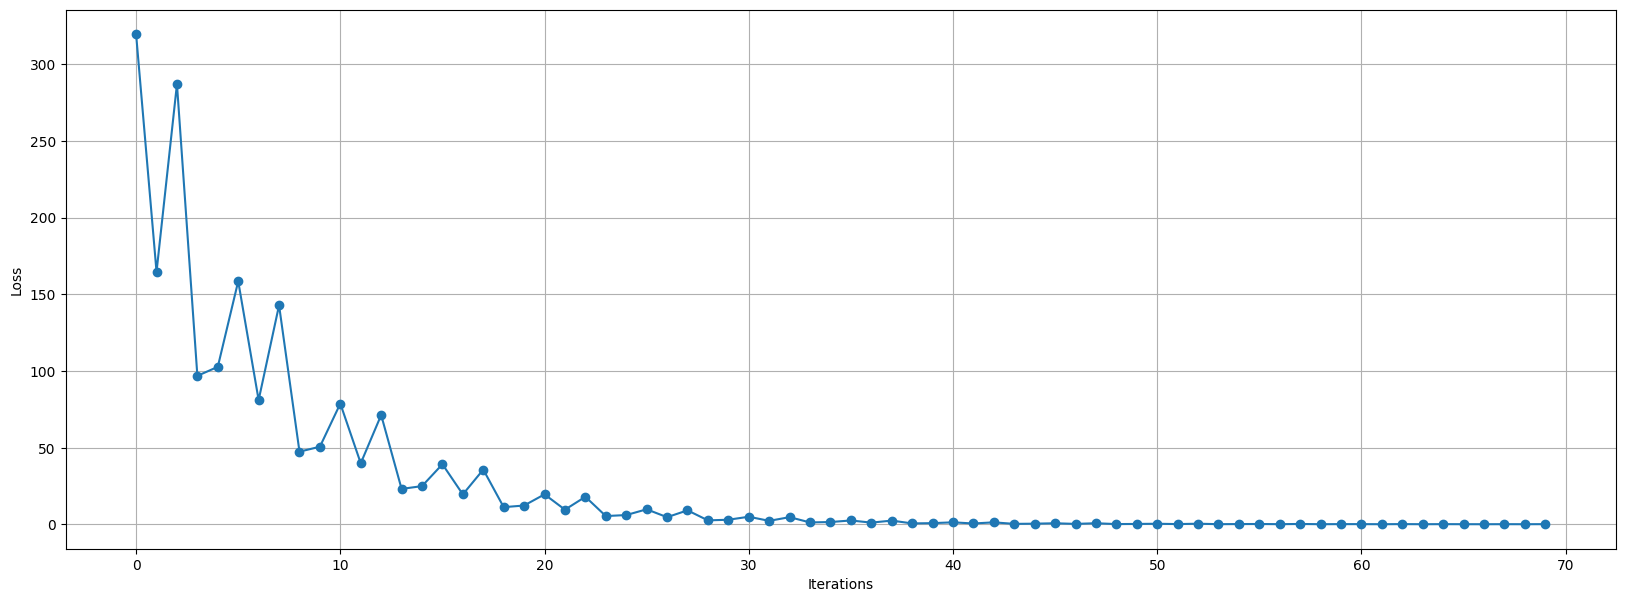

In [90]:
plot_loss(loss_St)

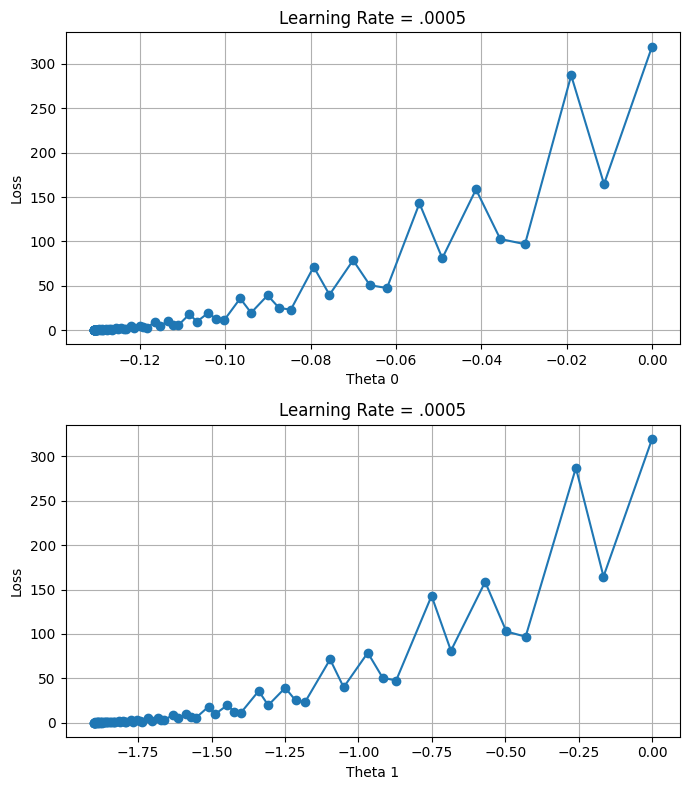

In [91]:
plot_thetas_0_1_vs_loss(all_theta_0_St,all_theta_1_St,loss_St)

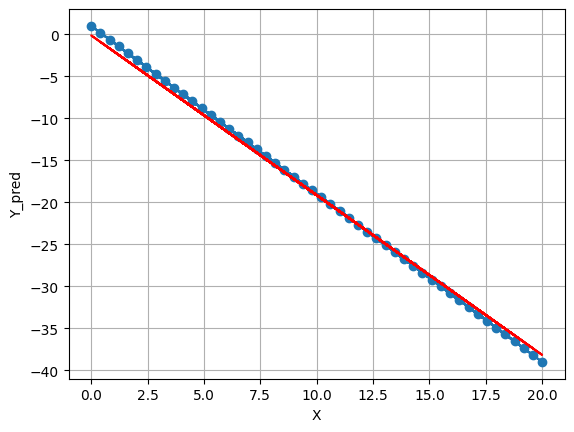

In [92]:
plot_best_reg(X, y, [opt_theta_0_St + opt_theta_1_St * X])

##### The following results uses batch size=20, alpha = 0.0005 and max. iterations = 300.

In [97]:
all_theta_0_St,all_theta_1_St,loss_St,opt_theta_0_St,opt_theta_1_St  = MB_GD_LR_1var(X,y,0.0005,300, 20)

******************** Epochs 0 ******************** 

cost = 69.47698295286793

Gradient Vector : [ 6.64058944 84.01626746]
Gradient Vector Norm : 84.2782927361842

theta_0_new : -0.02248661577432028
theta_1_new : -0.30756032481756423

******************** Epochs 1 ******************** 

cost = 48.89466402349149

Gradient Vector : [ 5.5386588  70.46045254]
Gradient Vector Norm : 70.67780495840918

theta_0_new : -0.04130344504048236
theta_1_new : -0.5657333606401489

******************** Epochs 2 ******************** 

cost = 34.4069464435517

Gradient Vector : [ 4.61370049 59.08161001]
Gradient Vector Norm : 59.261478832428345

theta_0_new : -0.0570398440104336
theta_1_new : -0.7824502972913535

******************** Epochs 3 ******************** 

cost = 24.211152895000016

Gradient Vector : [ 3.83729423 49.53013605]
Gradient Vector Norm : 49.67855879333876

theta_0_new : -0.0701905231440299
theta_1_new : -0.9643686409333774

******************** Epochs 4 ******************** 

cost = 1

In [98]:
r2_score(y, opt_theta_0_St + opt_theta_1_St * X)

0.996806254725089

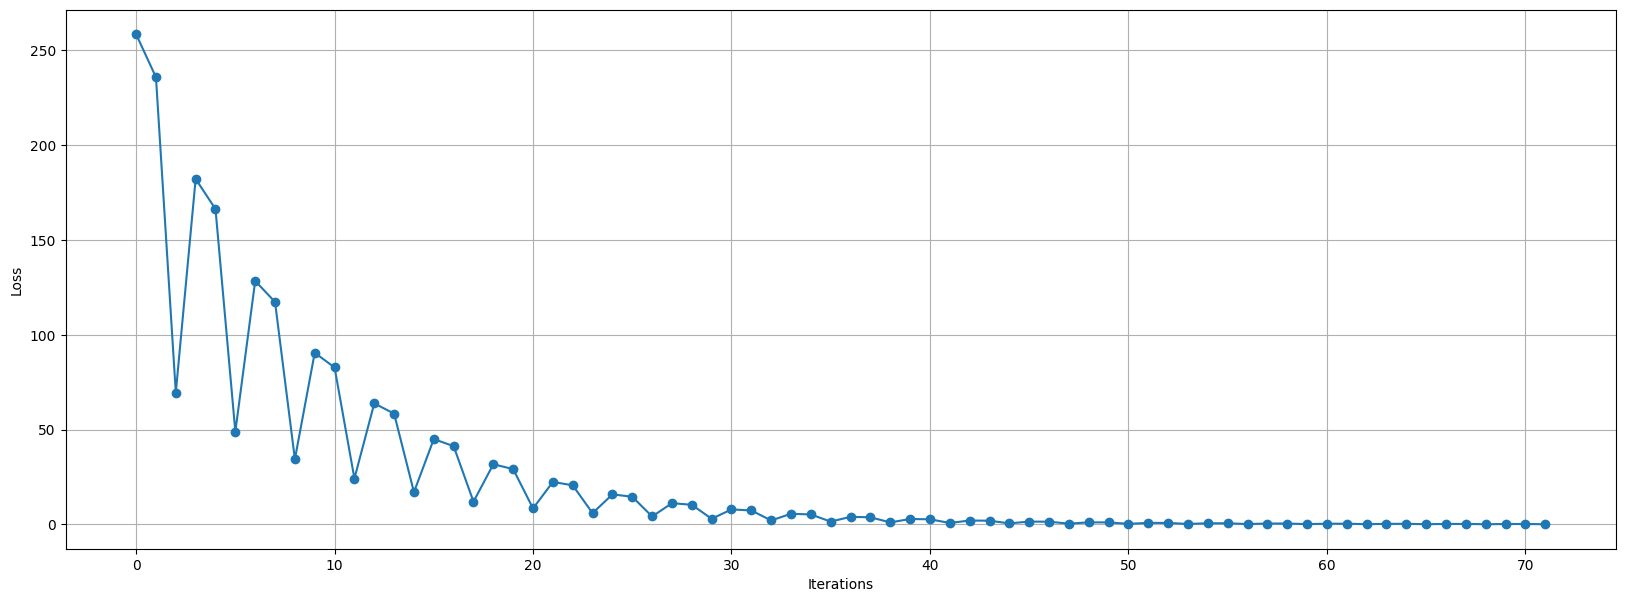

In [99]:
plot_loss(loss_St)

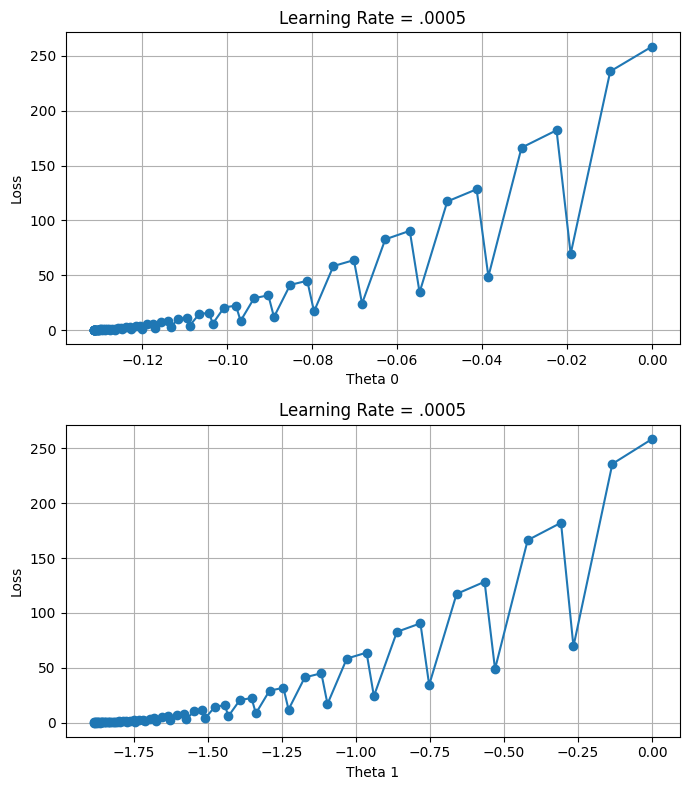

In [100]:
plot_thetas_0_1_vs_loss(all_theta_0_St,all_theta_1_St,loss_St)

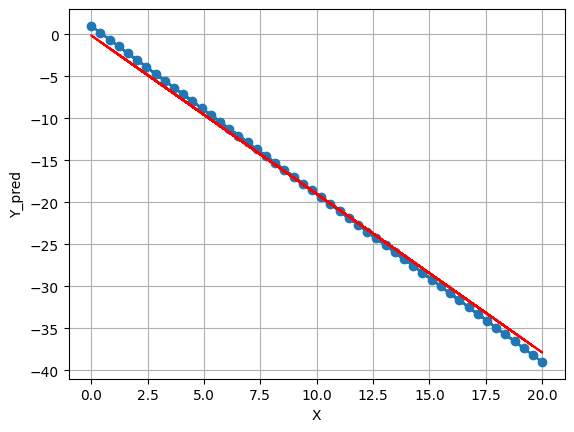

In [101]:
plot_best_reg(X, y, [opt_theta_0_St + opt_theta_1_St * X])